# Knowledge Distillation in MNIST Dataset

In [54]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras_flops import get_flops

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
plt.style.use('_mpl-gallery')

from Utilities import *

# Data loading

In [2]:
mnist_train, mnist_test = loadMnist()

# Load Teacher and Student Models

In [36]:
teacherModel = getTeacherModel()
studenModel = getStudentModel()
fc_model_no_distillation = getStudentModel()


# Train teacher and Student using default temprature

In [39]:
# Training Teacher model
teacherTrainACC = train_evaluate(teacherModel,mnist_train,mnist_test)
teacherTestAcc = testModel(teacherModel,mnist_test)

# Training student model using KD
studentTrainKdACC = train_and_evaluate_using_KD(studenModel,teacherModel,mnist_train,mnist_test,0.5,10)
studentTestAcc = testModel(studenModel,mnist_test)

# Training student model from scratch
studentTrainACC = train_evaluate(fc_model_no_distillation,mnist_train,mnist_test)
teacherTestAcc = testModel(fc_model_no_distillation,mnist_test)


Epoch 1: Class_accuracy: 99.25%
Epoch 2: Class_accuracy: 99.30%
Epoch 3: Class_accuracy: 99.27%
Epoch 4: Class_accuracy: 99.40%
Epoch 5: Class_accuracy: 99.30%
Epoch 6: Class_accuracy: 99.36%
Epoch 7: Class_accuracy: 99.33%
Epoch 8: Class_accuracy: 99.29%
Epoch 9: Class_accuracy: 99.29%
Epoch 10: Class_accuracy: 99.23%
Epoch 11: Class_accuracy: 99.30%
Epoch 12: Class_accuracy: 99.31%
model Testing Accuracy: 99.31%
Epoch 1: Class_accuracy: 97.95%
Epoch 2: Class_accuracy: 98.34%
Epoch 3: Class_accuracy: 98.23%
Epoch 4: Class_accuracy: 97.99%
Epoch 5: Class_accuracy: 98.09%
Epoch 6: Class_accuracy: 98.30%
Epoch 7: Class_accuracy: 98.59%
Epoch 8: Class_accuracy: 98.60%
Epoch 9: Class_accuracy: 98.71%
Epoch 10: Class_accuracy: 98.65%
Epoch 11: Class_accuracy: 98.66%
Epoch 12: Class_accuracy: 98.70%
model Testing Accuracy: 98.70%
Epoch 1: Class_accuracy: 98.24%
Epoch 2: Class_accuracy: 98.11%
Epoch 3: Class_accuracy: 98.35%
Epoch 4: Class_accuracy: 98.32%
Epoch 5: Class_accuracy: 98.43%
Epoc

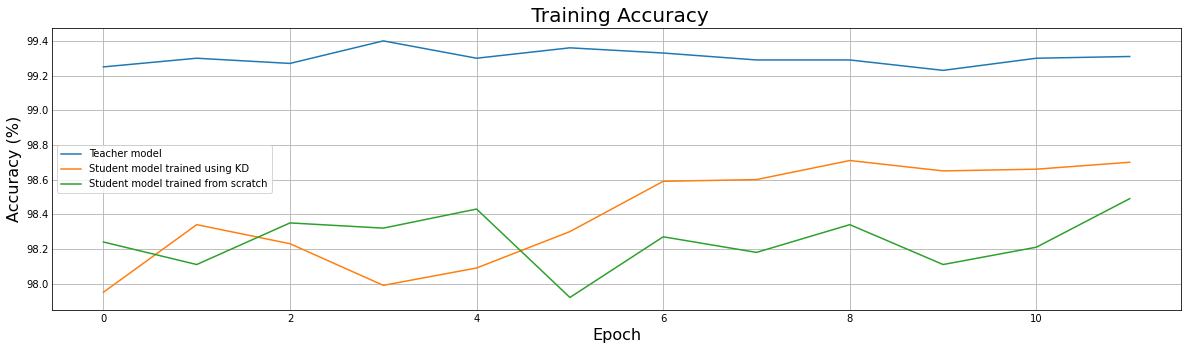

In [67]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(teacherTrainACC, label = "Teacher model")
ax.plot(studentTrainKdACC, label = 'Student model trained using KD')
ax.plot(studentTrainACC, label = 'Student model trained from scratch')
ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Training Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig3.png', bbox_inches='tight')


# Test accuracy vs. tempreture curve

In [42]:
testACC = []
tempratureValues = [1, 2, 4, 16, 32, 64]
for temp in tempratureValues:
    st = getStudentModel()
    train_and_evaluate_using_KD(st,teacherModel,mnist_train,mnist_test,0.5, temp)
    testACC += [float(testModel(st,mnist_test))]

Epoch 1: Class_accuracy: 96.50%
Epoch 2: Class_accuracy: 97.31%
Epoch 3: Class_accuracy: 97.69%
Epoch 4: Class_accuracy: 97.84%
Epoch 5: Class_accuracy: 97.97%
Epoch 6: Class_accuracy: 97.96%
Epoch 7: Class_accuracy: 98.11%
Epoch 8: Class_accuracy: 97.86%
Epoch 9: Class_accuracy: 97.71%
Epoch 10: Class_accuracy: 97.64%
Epoch 11: Class_accuracy: 98.14%
Epoch 12: Class_accuracy: 98.19%
model Testing Accuracy: 98.19%
Epoch 1: Class_accuracy: 96.93%
Epoch 2: Class_accuracy: 97.39%
Epoch 3: Class_accuracy: 97.77%
Epoch 4: Class_accuracy: 97.87%
Epoch 5: Class_accuracy: 97.95%
Epoch 6: Class_accuracy: 98.08%
Epoch 7: Class_accuracy: 97.91%
Epoch 8: Class_accuracy: 97.86%
Epoch 9: Class_accuracy: 97.94%
Epoch 10: Class_accuracy: 98.15%
Epoch 11: Class_accuracy: 98.02%
Epoch 12: Class_accuracy: 98.28%
model Testing Accuracy: 98.28%
Epoch 1: Class_accuracy: 96.92%
Epoch 2: Class_accuracy: 97.55%
Epoch 3: Class_accuracy: 97.81%
Epoch 4: Class_accuracy: 97.80%
Epoch 5: Class_accuracy: 97.87%
Epoc

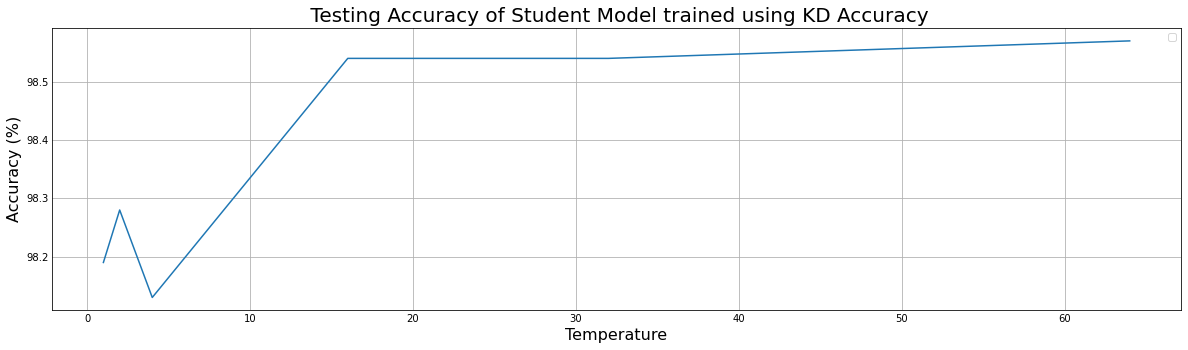

In [49]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(tempratureValues,testACC )
ax.set_xlabel('Temperature', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Testing Accuracy of Student Model trained using KD Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig4.png', bbox_inches='tight')

# Comparing the teacher and student model (number of of parameters and FLOPs) 

In [58]:
# Teacher Model Summary
print( teacherModel.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 64)        18496     
                                                                 
 activation_3 (Activation)   (None, 23, 23, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                  

In [59]:
# Teacher Model FLOPs
flops = get_flops(teacherModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

FLOPS: 0.022 G


In [61]:
# Student Model Trainable Parameters
print(studenModel.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
# Student Model Flops
flops = get_flops(studenModel, batch_size=1)
print(f"FLOPS: {flops / 10 ** 9:.03} G")

FLOPS: 0.00248 G


# Implementing the state-of-the-art KD algorithm

In [63]:
teachingAssistant = getTeachingAssistantModel()
teachingAssistantAcc = train_and_evaluate_using_KD(teachingAssistant,teacherModel,mnist_train,mnist_test,0.5,4)
teachingAssistantTestAcc = testModel(teachingAssistant,mnist_test)
student = getStudentModel()
studentAcc = train_and_evaluate_using_KD(student,teachingAssistant,mnist_train,mnist_test,0.5,4)
studentTestAcc = testModel(student,mnist_test)

Epoch 1: Class_accuracy: 96.44%
Epoch 2: Class_accuracy: 97.26%
Epoch 3: Class_accuracy: 97.62%
Epoch 4: Class_accuracy: 97.83%
Epoch 5: Class_accuracy: 97.90%
Epoch 6: Class_accuracy: 97.87%
Epoch 7: Class_accuracy: 98.00%
Epoch 8: Class_accuracy: 98.16%
Epoch 9: Class_accuracy: 97.80%
Epoch 10: Class_accuracy: 98.13%
Epoch 11: Class_accuracy: 97.87%
Epoch 12: Class_accuracy: 98.06%
model Testing Accuracy: 98.06%
Epoch 1: Class_accuracy: 96.58%
Epoch 2: Class_accuracy: 97.23%
Epoch 3: Class_accuracy: 97.76%
Epoch 4: Class_accuracy: 97.83%
Epoch 5: Class_accuracy: 97.53%
Epoch 6: Class_accuracy: 97.81%
Epoch 7: Class_accuracy: 98.32%
Epoch 8: Class_accuracy: 98.21%
Epoch 9: Class_accuracy: 97.76%
Epoch 10: Class_accuracy: 98.27%
Epoch 11: Class_accuracy: 98.10%
Epoch 12: Class_accuracy: 98.45%
model Testing Accuracy: 98.45%


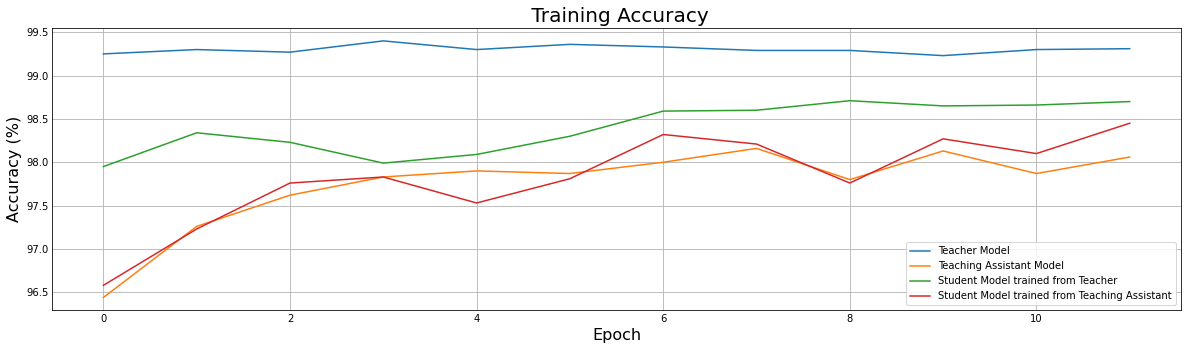

In [66]:
f, ax = plt.subplots(figsize=(16, 4))

ax.plot(teacherTrainACC, label = "Teacher Model")
ax.plot(teachingAssistantAcc, label = 'Teaching Assistant Model')
ax.plot(studentTrainKdACC, label = 'Student Model trained from Teacher')
ax.plot(studentAcc, label = 'Student Model trained from Teaching Assistant')
ax.set_xlabel('Epoch', fontsize = 16)
ax.set_ylabel('Accuracy (%)', fontsize = 16)
ax.set_title(' Training Accuracy', fontsize = 20)
ax.legend()
plt.show()
f.savefig('Figures/fig6.png', bbox_inches='tight')